# Analysis of a single HSC image with a LEOsat

The single CCD was provided by Tony Tyson. Clare Saunders did the image reduction, which included fudging the date to be in 2017 to use existing pre-ingested calibration products. This notebooks runs on lsst-dev.

In [1]:
%matplotlib notebook

import sys
import importlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import pandas as pd

from astropy import coordinates as coord
from astropy.time import Time
import astropy.units as u
import astropy.constants as c
from astropy.modeling import models, fitting
from astropy.visualization import ZScaleInterval, SqrtStretch, ImageNormalize
from astropy.table import Table, Column

import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

In [2]:
sys.path.append('/project/mrawls/starlink/starlink')
import starlinkAnalysis as slk

In [33]:
# Only if you change anything in the code imported above
importlib.reload(slk)

<module 'starlinkAnalysis' from '/project/mrawls/starlink/starlink/starlinkAnalysis.py'>

In [3]:
repo = '/project/csaunder/satellite_mrawls/DATA/rerun/processCcdOutputs'
butler = dafPersist.Butler(repo)

In [4]:
dataId = {'filter': 'HSC-R2'}
calexp = butler.get('calexp', dataId=dataId)
src = butler.get('src', dataId=dataId)
psfRadius = calexp.getPsf().computeShape().getDeterminantRadius()

<IPython.core.display.Javascript object>


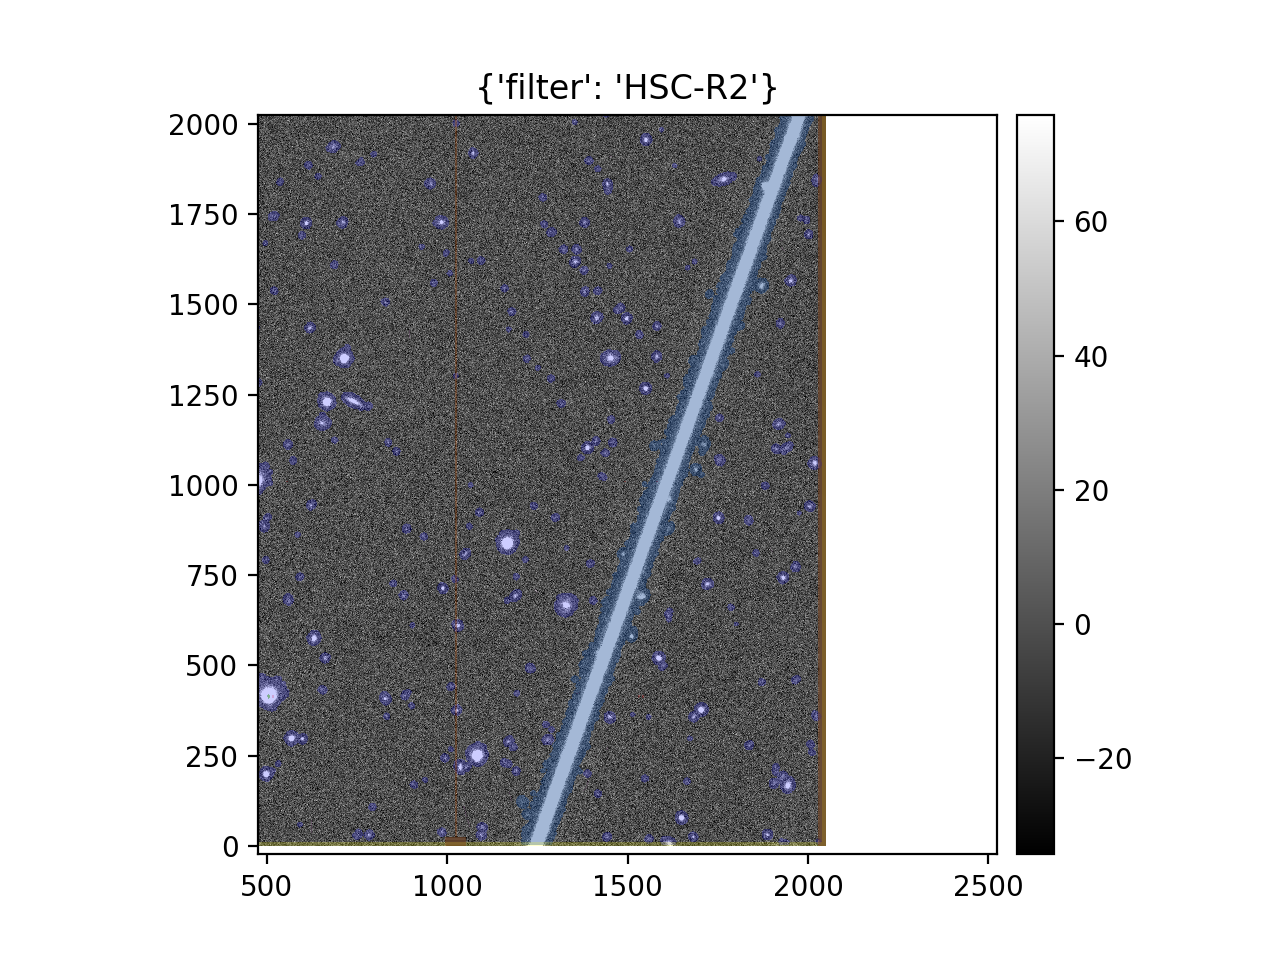

In [24]:
disp1 = afwDisplay.Display(1)
disp1.scale("linear", "zscale", Q=8)
disp1.setMaskTransparency(80)
disp1.mtv(calexp, title=str(dataId))
disp1.zoom(2)
disp1.pan(1500, 1000)
#plt.plot(src['slot_Centroid_x'], src['slot_Centroid_y'], marker='o',
#         mfc='None', ls='None', ms=psfRadius*2.355, color='yellow')

In [11]:
photoCalib = calexp.getPhotoCalib()
njyImage = photoCalib.calibrateImage(calexp.maskedImage)
imageArray = njyImage.image.array

### Update the imported `slk` functions above as needed and run the analysis

Changes of note:
* I did questionable things with geometry to get the image to rotate and define start/end in the rotated frame correctly
* I added a `dateOverride` option to get the real date of observation back into the visitInfo (image metadata used to compute a whole host of things)
* I un-hard-coded the observatory location and now have it as an argument `obsLoc` ... turns out if you mistakenly assume your observatory is in Chile but it's actually in Hawaii then it looks like the Sun is above the horizon

<IPython.core.display.Javascript object>


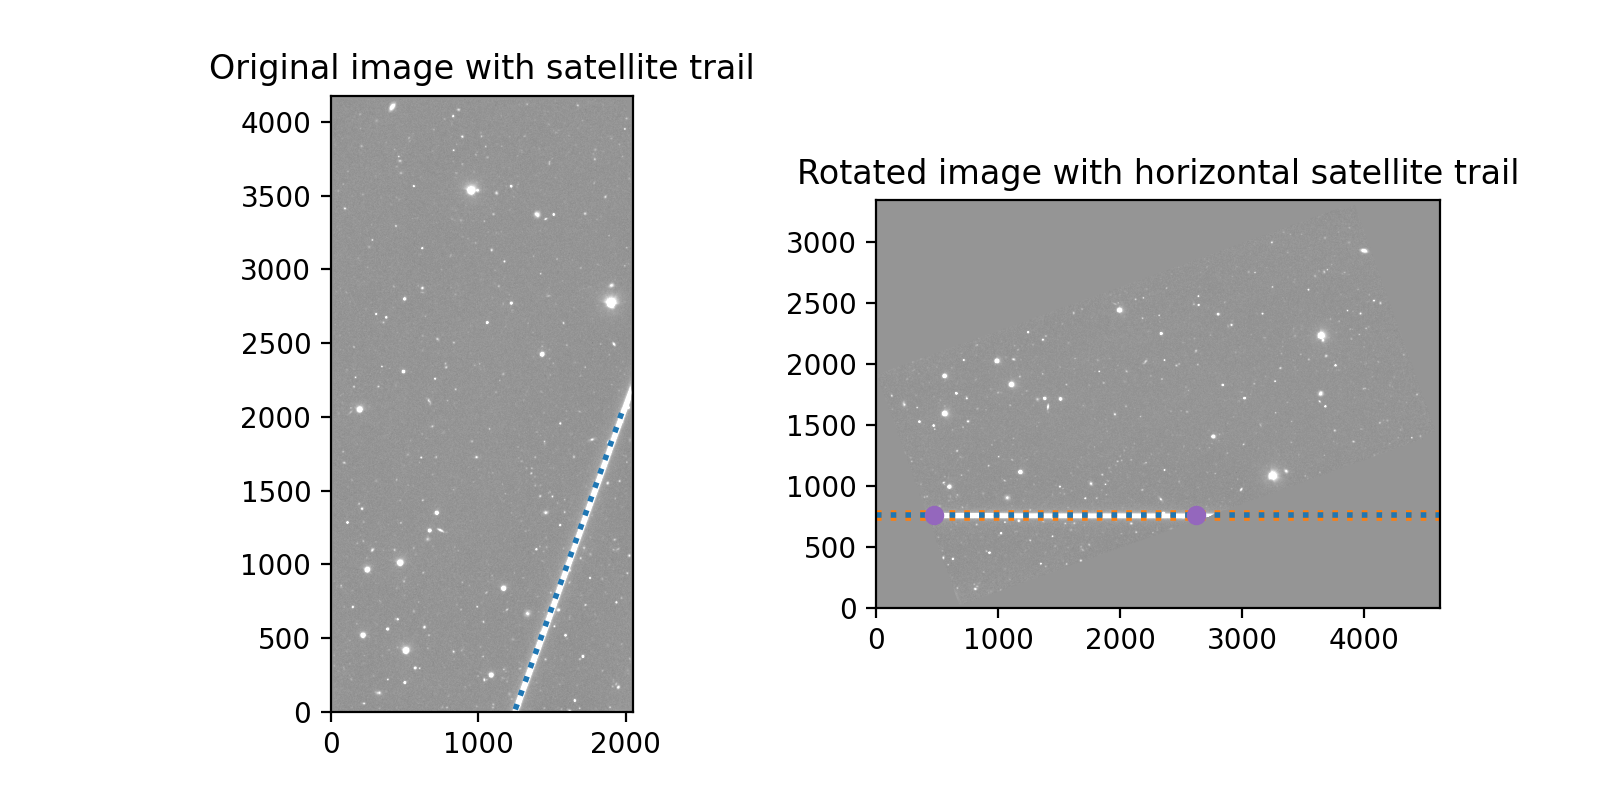

<IPython.core.display.Javascript object>


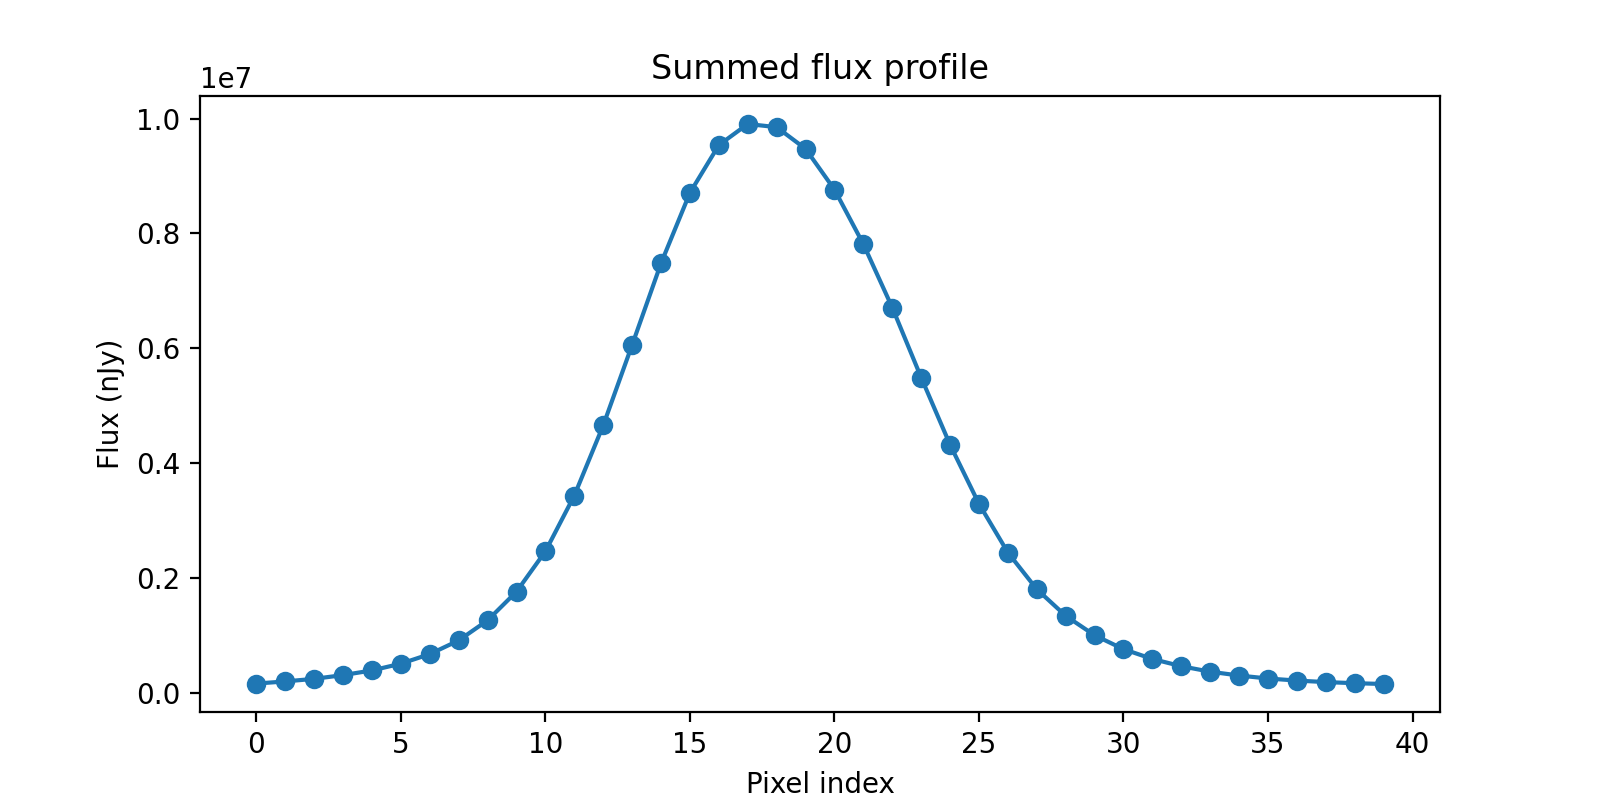

<IPython.core.display.Javascript object>


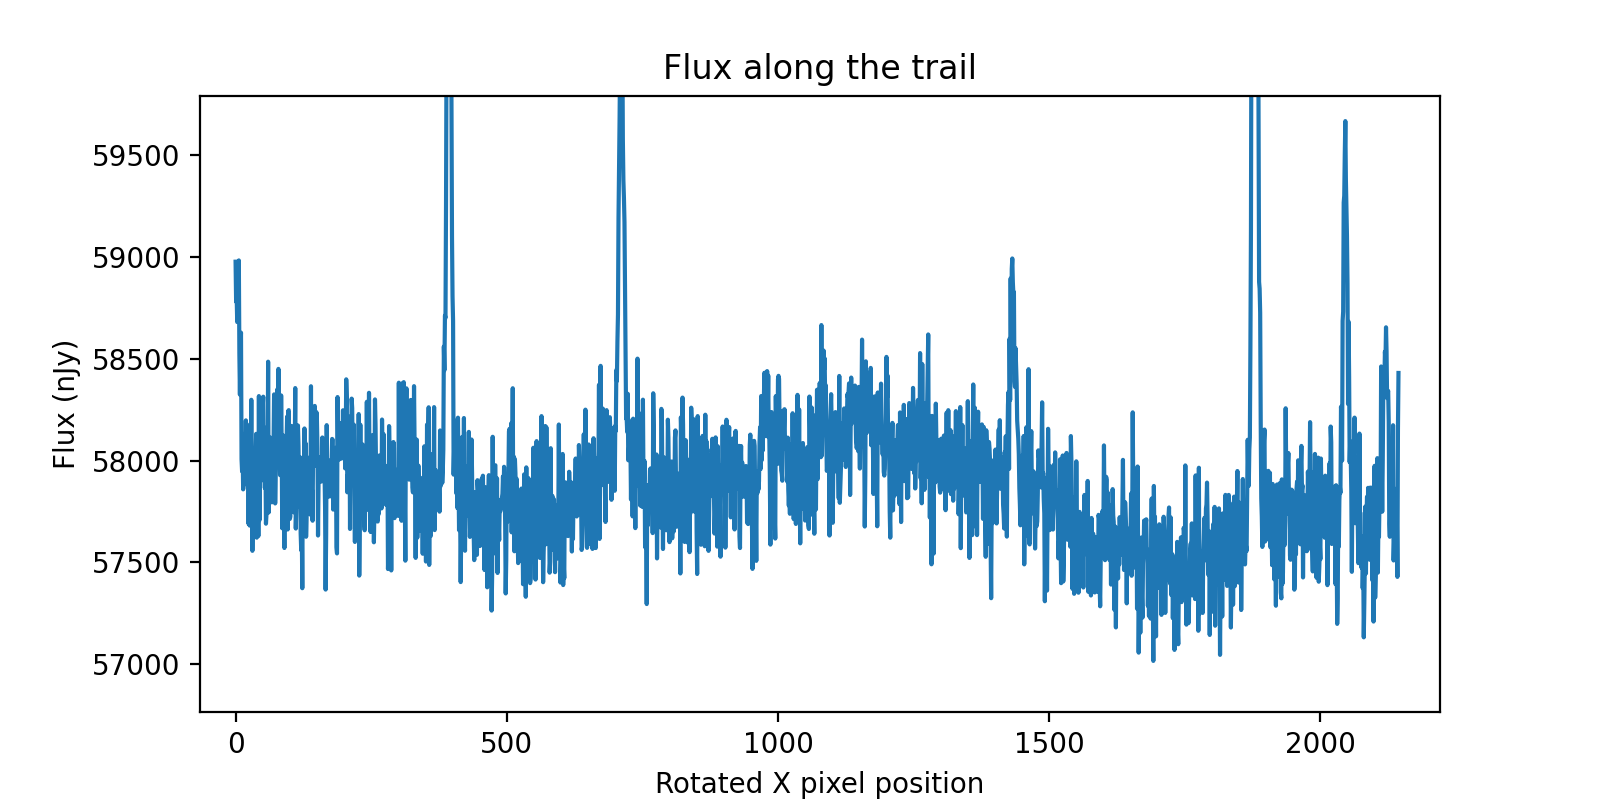

In [34]:
trailPoint1 = [1250.35, 16.99]
trailPoint2 = [1975.21, 2036.16]
results = slk.starlinkAnalyze(repo, dataId, trailPoint1, trailPoint2,
                              obsLoc="Subaru Telescope", dateOverride='2020-05-28')

In [35]:
results

{'Date and time (UTC)': <Time object: scale='utc' format='isot' value=2020-05-28T14:33:15.865>,
 'Exposure time': <Quantity 40. s>,
 'Boresight Az': <Quantity 100.38 deg>,
 'Boresight Alt': <Quantity 34.31 deg>,
 'Sun Az': <Quantity 59.66 deg>,
 'Sun Alt': <Quantity -15.4 deg>,
 'Phase angle': <Quantity 121.27 deg>,
 'Airmass': 1.77,
 'Image PSF radius': <Quantity 0.47 arcsec>,
 'Image PSF FWHM': <Quantity 1.11 arcsec>,
 'Background (mag)': <Quantity 20.19 1 / arcsec2>,
 'Summed trail flux': <Quantity 1.24310024e+08 nJy>,
 'Trail FWHM': <Quantity 1.97 arcsec>,
 'Trail length': <Quantity 352.23 arcsec>,
 'Raw trail flux': <Quantity 178928.5 nJy / arcsec2>,
 'Raw trail (mag)': <Quantity 18.27 1 / arcsec2>,
 'Corrected trail (mag)': <Quantity 14.26 1 / arcsec2>,
 'Angular speed': <Quantity 0.38 deg / s>,
 'Stationary magnitude': 5.69,
 'Corrected stationary mag': 4.45,
 'Derived satellite size': <Quantity 5.92 m>,
 'Distance to satellite': <Quantity 902.87 km>}

## Just for fun, a couple more plots of the satellite trail to squint at

<IPython.core.display.Javascript object>


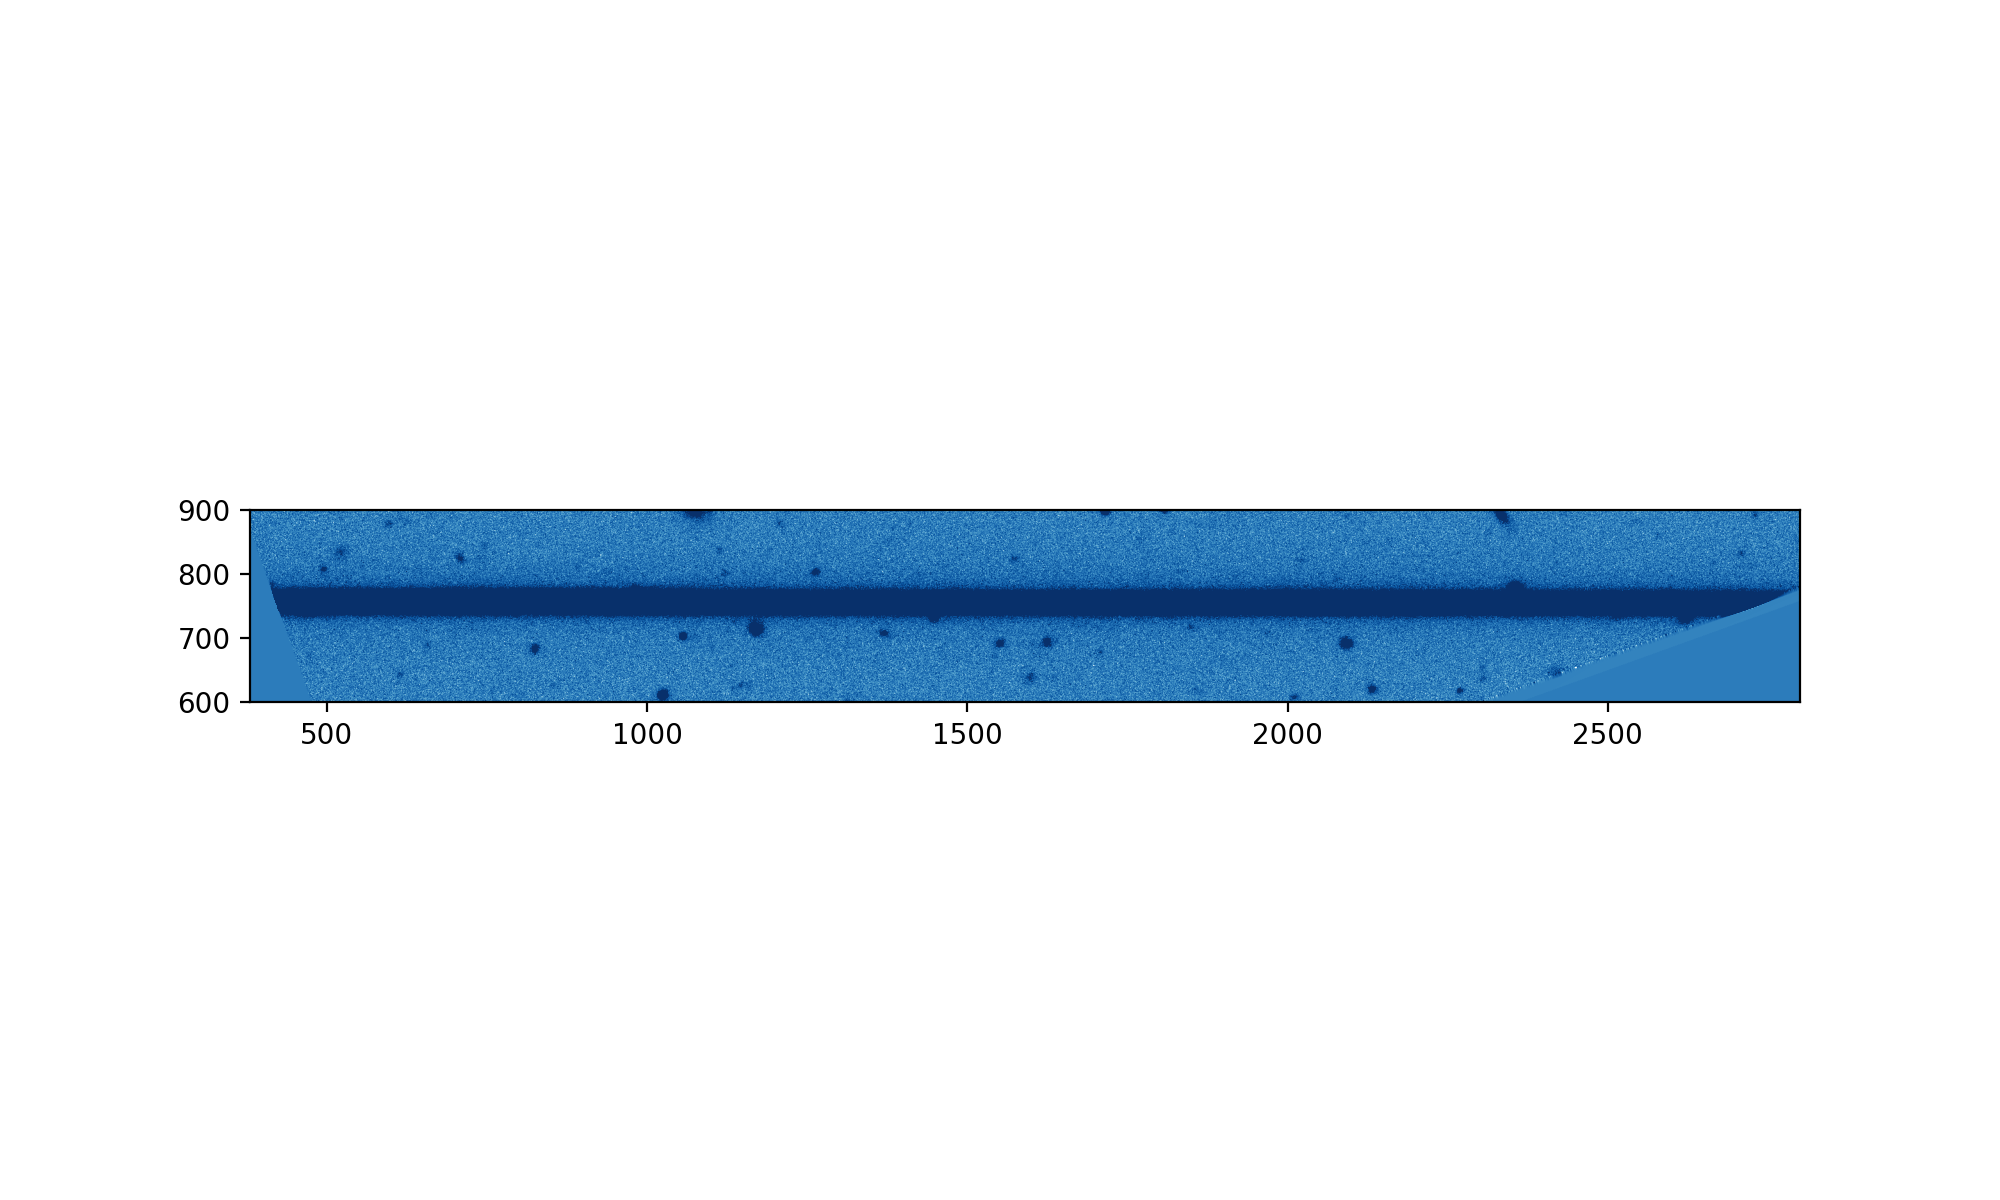

(600.0, 900.0)

In [53]:
plt.figure(figsize=(10, 6))
njyImage = photoCalib.calibrateImage(calexp.maskedImage)
rotatedArray, _, _, _ = slk.makeTrailHorizontal(njyImage.image.array, trailPoint1, trailPoint2, trailWidth)
norm = ImageNormalize(rotatedArray, interval=ZScaleInterval(), stretch=SqrtStretch())
plt.imshow(rotatedArray, cmap='Blues', norm=norm, origin='lower')
plt.gca().set_xlim([380, 2800])
plt.gca().set_ylim([600, 900])

<IPython.core.display.Javascript object>


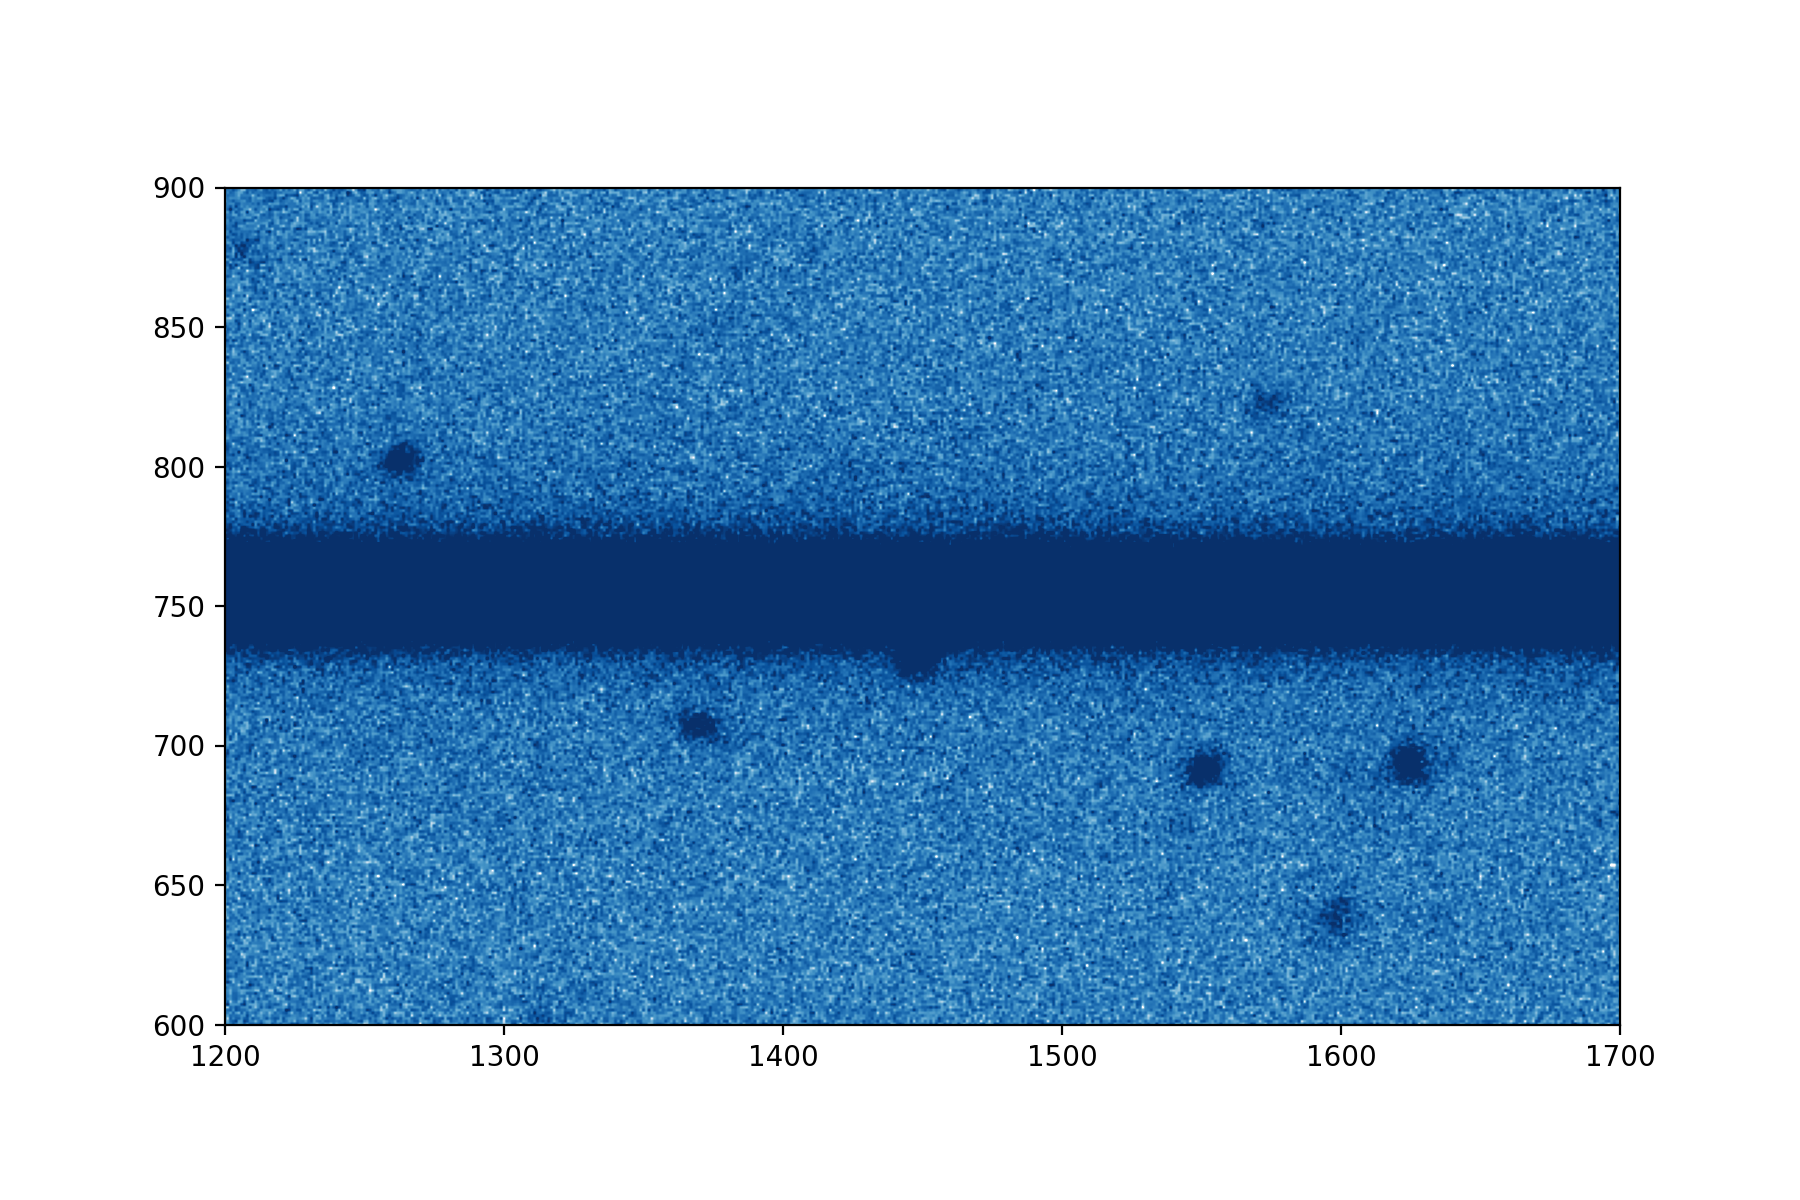

(600.0, 900.0)

In [55]:
plt.figure(figsize=(9, 6))
njyImage = photoCalib.calibrateImage(calexp.maskedImage)
rotatedArray, _, _, _ = slk.makeTrailHorizontal(njyImage.image.array, trailPoint1, trailPoint2, trailWidth)
norm = ImageNormalize(rotatedArray, interval=ZScaleInterval(), stretch=SqrtStretch())
plt.imshow(rotatedArray, cmap='Blues', norm=norm, origin='lower')
plt.gca().set_xlim([1200, 1700])
plt.gca().set_ylim([600, 900])